# Fundamentals of Probability

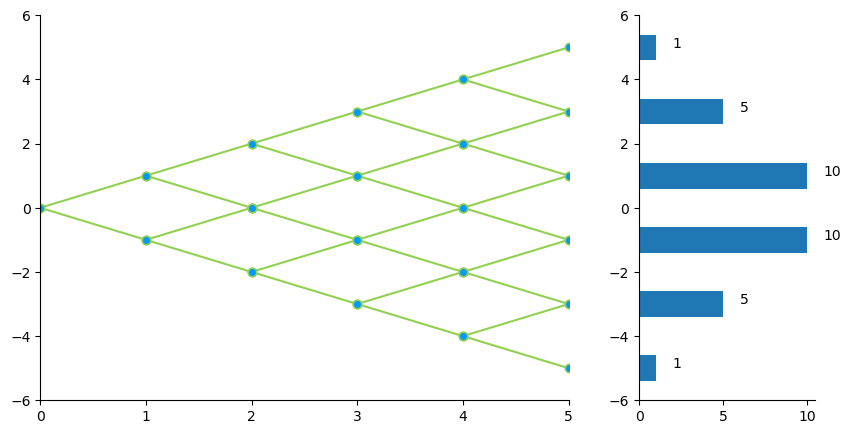

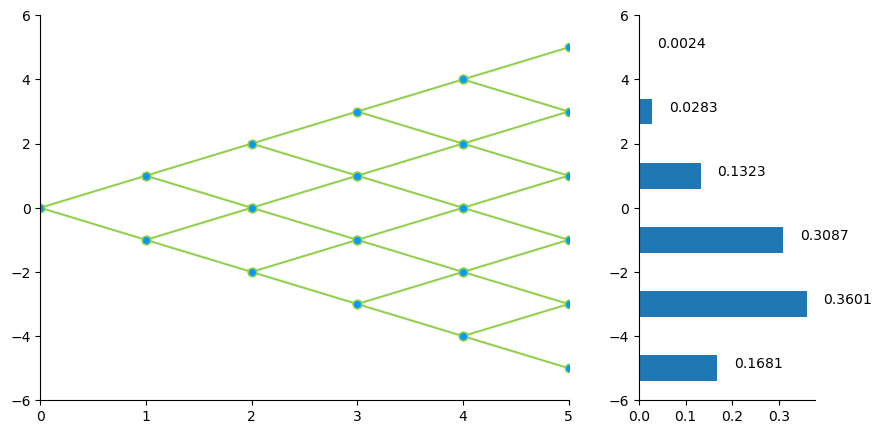

In [2]:

from matplotlib import pyplot as plt
import numpy as np
from sympy.abc import x
from sympy import Poly
import seaborn as sns

n = 5
# starting point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [3, 1]})

for i in np.arange(n):
    
    Nodes_y = np.linspace(-i,i,i+1)
    
    B_y = np.concatenate((Nodes_y+1, Nodes_y-1))
    B_x = np.zeros_like(B_y) + i + 1
    B = np.stack((B_x,B_y))                          # 将矩阵叠加
    
    A_y = np.concatenate((Nodes_y, Nodes_y))         # 将多个数组进行连接
    A_x = np.zeros_like(A_y) + i                     # 用来生成和输入与矩阵形状相同的零矩阵
    
    x_AB = np.stack((A_x,B_x))
    
    y_AB = np.stack((A_y,B_y))

    ax1.plot(x_AB, y_AB, 'o-', color = '#92D050',
             markerfacecolor = '#0099FF',
             markeredgecolor = None)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_xlim(0,n)
ax1.set_ylim(B_y.min() - 1,B_y.max() + 1)

degrees = np.linspace(n,0,n + 1)

from scipy.special import binom

poly_coeffs = binom(n,degrees)                        # 产生二项式系数

locations = np.linspace(B_y.min(),B_y.max(),n+1)

ax2.barh(locations, poly_coeffs, align='center')

for i,(x,y) in enumerate(zip(locations.tolist(), poly_coeffs.tolist())):
    ax2.text(y + poly_coeffs.max()*0.1, x, str(int(y)))

ax2.set_ylim(B_y.min() - 1,B_y.max() + 1)
ax2.spines['right'].set_visible(False)              # 除去图像右侧黑线框
ax2.spines['top'].set_visible(False)                # 除去图像上侧黑线框


# Bk3_Ch20_1_B

#%% probability histogram

from scipy.stats import binom

p = 0.3 # 0.5

x = np.arange(0, n + 1)

p_x= binom.pmf(x, n, p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [3, 1]})

for i in np.arange(n):
    
    Nodes_y = np.linspace(-i,i,i+1)
    
    B_y = np.concatenate((Nodes_y+1, Nodes_y-1))
    B_x = np.zeros_like(B_y) + i + 1
    B = np.stack((B_x,B_y))
    
    A_y = np.concatenate((Nodes_y, Nodes_y))
    A_x = np.zeros_like(A_y) + i
    
    x_AB = np.stack((A_x,B_x))
    
    y_AB = np.stack((A_y,B_y))

    ax1.plot(x_AB, y_AB, 'o-', color = '#92D050',
             markerfacecolor = '#0099FF',
             markeredgecolor = None)


ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax1.set_xlim(0,n)
ax1.set_ylim(B_y.min() - 1,B_y.max() + 1)

ax2.barh(locations, p_x, align='center')

for i,(x,y) in enumerate(zip(locations.tolist(), p_x.tolist())):
    ax2.text(y + p_x.max()*0.1, x, "{:.4f}".format(y))

ax2.set_ylim(B_y.min() - 1,B_y.max() + 1)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)



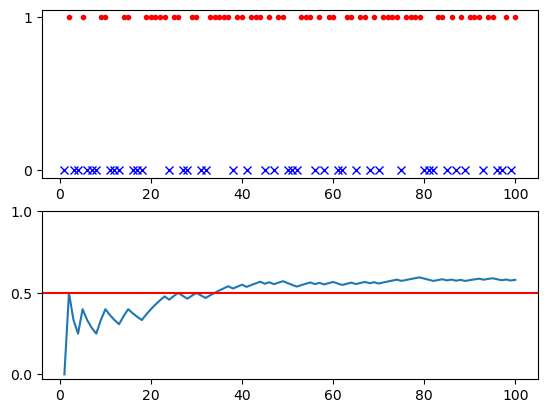

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_toss = 100
toss = np.random.randint(low = 0, high = 2, size = (num_toss,1))

up = (toss == 1)

iteration = np.arange(1,num_toss + 1)

fig, axs  = plt.subplots(2,1)

axs[0].plot(iteration[up.flatten()],  toss[up],  
         color = 'r', marker = '.',linestyle = 'None')

axs[0].plot(iteration[~up.flatten()], toss[~up], 
         color = 'b', marker = 'x',linestyle = 'None')

axs[0].set_yticks([0,1])

cum_mean = np.cumsum(toss)/iteration

axs[1].plot(iteration, cum_mean)
axs[1].axhline(y = 0.5, color = 'r')
axs[1].set_yticks([0,0.5,1])